In [83]:
from functions import *
import pandas as pd
from fbprophet import Prophet


In [96]:
elia_train = pd.read_csv("../data/train_elia.csv")
elia_test = pd.read_csv("../data/test_elia.csv")

In [97]:
elia_train = elia_train.rename(columns={"time": "ds", "TotalLoad": "y"})
elia_train.drop(['temparature1','temparature2','temparature3','temparature4','Weekday'], axis = 1, inplace = True)

In [105]:
fp = Prophet()
fp.add_country_holidays(country_name='BE')
fp.fit(elia_train)

In [112]:
future = fp.make_future_dataframe(periods=392, freq='15min')
future.tail()

,ds
105580,2020-01-05 00:45:00
105581,2020-01-05 01:00:00
105582,2020-01-05 01:15:00
105583,2020-01-05 01:30:00
105584,2020-01-05 01:45:00


In [113]:
forecast = fp.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
105580,2020-01-05 00:45:00,7891.067442,6780.921985,8969.250039
105581,2020-01-05 01:00:00,7781.866446,6640.734938,8967.019808
105582,2020-01-05 01:15:00,7669.890400,6604.054470,8748.865386
105583,2020-01-05 01:30:00,7557.309781,6486.329049,8588.807442
105584,2020-01-05 01:45:00,7446.695246,6286.447126,8595.320786


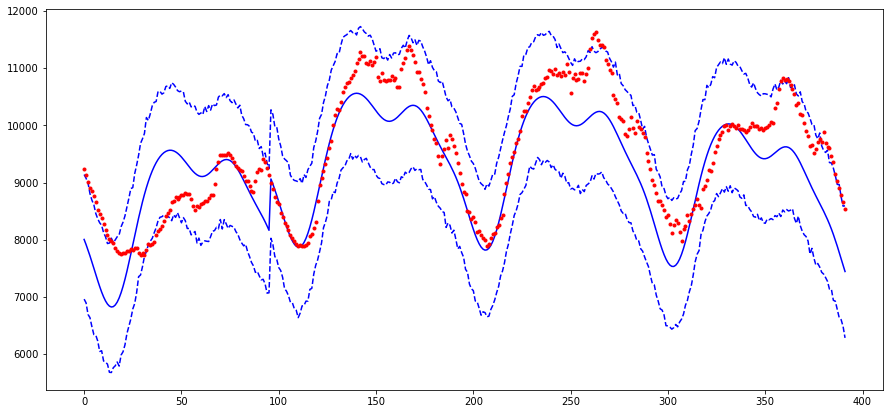

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,7))
plt.plot(forecast.yhat.iloc[elia_train.shape[0]:].to_numpy(), 'b-')
plt.plot(forecast.yhat_lower.iloc[elia_train.shape[0]:].to_numpy(), 'b--')
plt.plot(forecast.yhat_upper.iloc[elia_train.shape[0]:].to_numpy(), 'b--')

plt.plot(elia_test.TotalLoad.iloc[:392],'r.')

#plt.ylim( 10000, -10000)

In [117]:
get_eval(elia_test.TotalLoad.iloc[200:392] ,forecast.yhat.iloc[elia_train.shape[0]+200:].to_numpy())

MSE: 483220.51165214303
MAE: 574.0578610612973
r2_score: 0.47976343182755377


In [ ]:
import fbprophet
fig = fbprophet.plot()

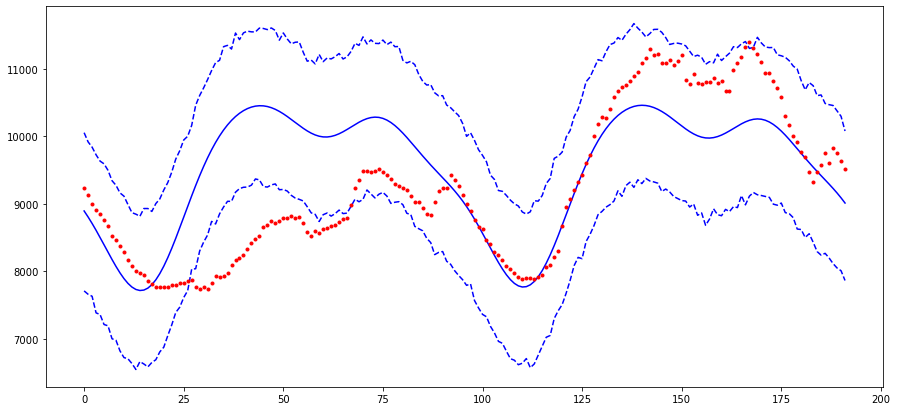

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,7))
plt.plot(forecast.yhat.iloc[elia_train.shape[0]:].to_numpy(), 'b-')
plt.plot(forecast.yhat_lower.iloc[elia_train.shape[0]:].to_numpy(), 'b--')
plt.plot(forecast.yhat_upper.iloc[elia_train.shape[0]:].to_numpy(), 'b--')

plt.plot(elia_test.TotalLoad.iloc[:192],'r.')

#plt.ylim( 10000, -10000)

In [111]:
get_eval(elia_test.TotalLoad.iloc[:192] ,forecast.yhat.iloc[elia_train.shape[0]:].to_numpy())

MSE: 440649.6486963601
MAE: 521.4073347809366
r2_score: 0.6396611618057344
